# Tugas VDI 3

Syadza Puspadari Azhar
122450072

- **Data:**
Dataset ini berisi informasi mengenai penjualan kopi pada bulan Maret 2024.

- **Tujuan Visualisasi:**
Untuk melihat grafik penjualan berdasarkan metode pembayaran, tanggal berapa penjualan naik, maupun jenis kopi apa yang paling banyak dibeli.

- **Fungsi:**
Harapannya dengan dibuat visualisasi ini dapat mempersiapkan perkiraan stock dari kopi, memperkirakan jumlah kostumer ataupun memperbaiki sistem pembayaran dari toko.
Tone: Informal tapi jelas, sesuai untuk presentasi dan laporan internal.

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv("index.csv")
df

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte
...,...,...,...,...,...,...
201,2024-03-30,2024-03-30 16:12:31.786,card,ANON-0000-0000-0017,38.7,Latte
202,2024-03-30,2024-03-30 16:36:40.513,card,ANON-0000-0000-0009,38.7,Latte
203,2024-03-30,2024-03-30 16:37:57.553,card,ANON-0000-0000-0009,33.8,Americano with Milk
204,2024-03-31,2024-03-31 10:40:04.523,card,ANON-0000-0000-0089,38.7,Cappuccino


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         206 non-null    object 
 1   datetime     206 non-null    object 
 2   cash_type    206 non-null    object 
 3   card         175 non-null    object 
 4   money        206 non-null    float64
 5   coffee_name  206 non-null    object 
dtypes: float64(1), object(5)
memory usage: 9.8+ KB


In [30]:
df.isnull().sum()

,0
date,0
datetime,0
cash_type,0
card,31
money,0
coffee_name,0


In [31]:
df = df.drop('card',axis=1)

In [32]:
df = df.drop('datetime',axis=1)

In [33]:
df.isnull().sum()

,0
date,0
cash_type,0
money,0
coffee_name,0


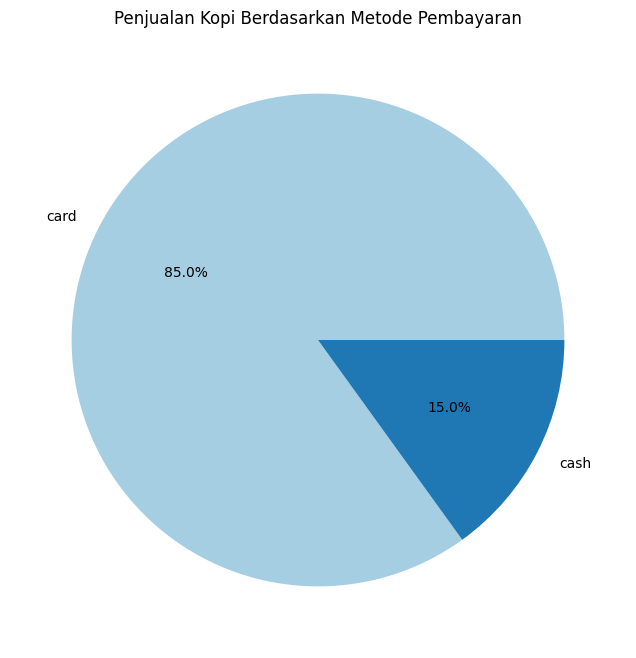

In [34]:
import matplotlib.pyplot as plt

# Mengelompokkan data berdasarkan metode pembayaran dan menghitung jumlahnya
dfSales = df.groupby('cash_type').size().reset_index(name='count')

# Membuat plot pie chart
plt.figure(figsize=(12, 8))
plt.pie(dfSales['count'], labels=dfSales['cash_type'], autopct='%1.1f%%', colors=plt.cm.Paired.colors)

# Menambahkan judul
plt.title('Penjualan Kopi Berdasarkan Metode Pembayaran')

# Menampilkan plot
plt.show()

Berdasarkan visualisasi di atas, terlihat bahwa metode pembayaran dengan kartu paling banyak digunakan oleh pembeli yaitu sebesar 85% dari pembeli di bulan Mei

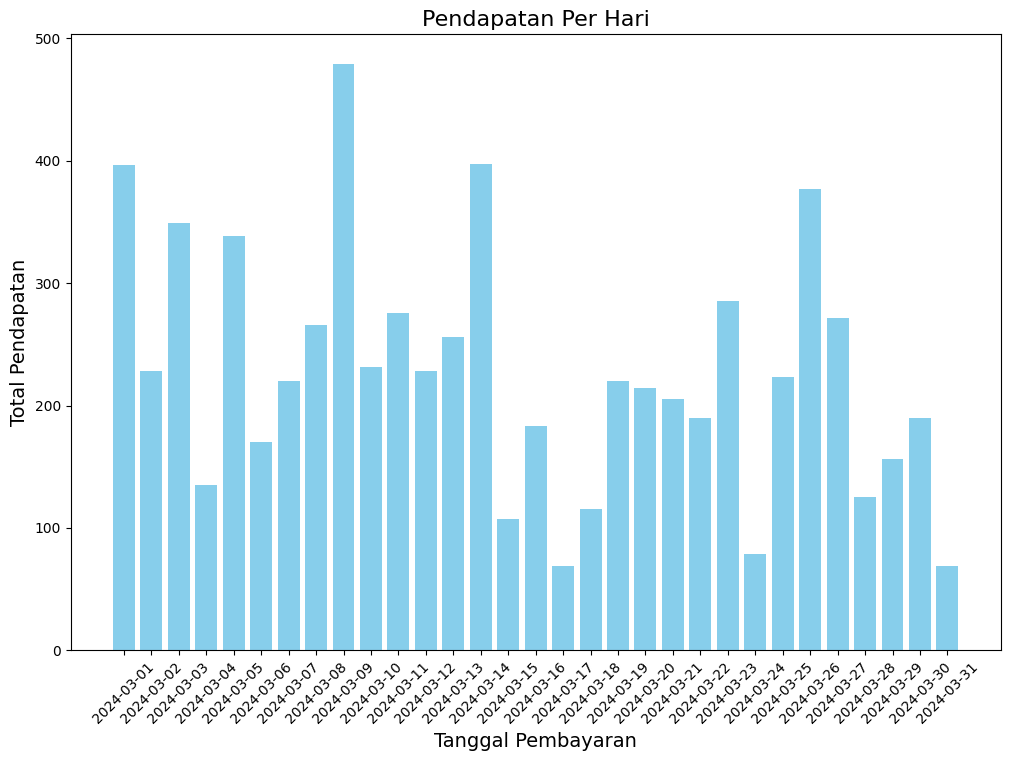

In [36]:
import matplotlib.pyplot as plt
import pandas as pd

# Mengelompokkan data berdasarkan tanggal dan menghitung total jumlah uang yang dibayarkan
dfSales = df.groupby('date')['money'].sum().reset_index()

# Membuat plot bar
plt.figure(figsize=(12, 8))
plt.bar(dfSales['date'], dfSales['money'], color='skyblue')

# Mengatur label dan judul
plt.title('Pendapatan Per Hari', fontsize=16)
plt.xlabel('Tanggal Pembayaran', fontsize=14)
plt.ylabel('Total Pendapatan', fontsize=14)

# Memutar label tanggal untuk tampilan yang lebih rapi
plt.xticks(rotation=45)

# Menampilkan plot
plt.show()

In [37]:
df.sort_values(by='money', ascending=False)

,date,cash_type,money,coffee_name
18,2024-03-03,cash,40.0,Latte
60,2024-03-09,cash,40.0,Hot Chocolate
105,2024-03-14,cash,40.0,Latte
46,2024-03-07,cash,40.0,Latte
200,2024-03-30,cash,40.0,Cappuccino
...,...,...,...,...
61,2024-03-09,card,24.0,Espresso
114,2024-03-14,card,24.0,Espresso
111,2024-03-14,card,24.0,Espresso
154,2024-03-22,card,24.0,Espresso


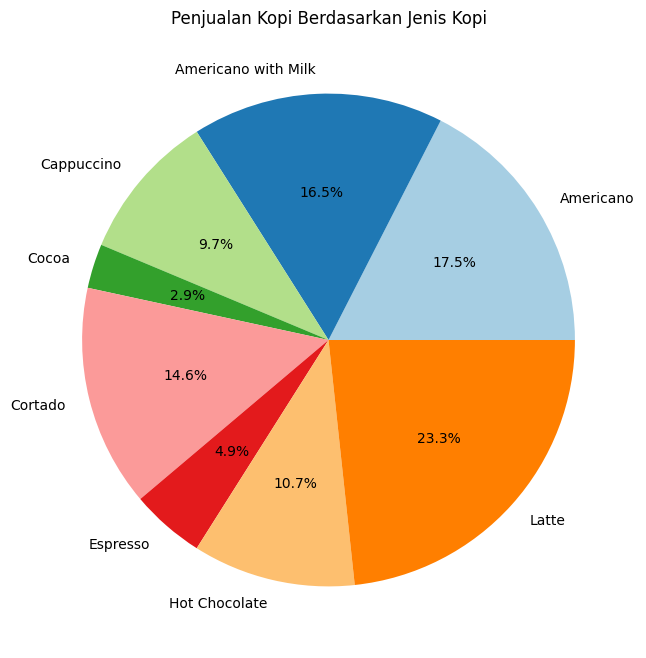

In [38]:
import matplotlib.pyplot as plt

# Mengelompokkan data berdasarkan metode pembayaran dan menghitung jumlahnya
dfSales = df.groupby('coffee_name').size().reset_index(name='count')

# Membuat plot pie chart
plt.figure(figsize=(12, 8))
plt.pie(dfSales['count'], labels=dfSales['coffee_name'], autopct='%1.1f%%', colors=plt.cm.Paired.colors)

# Menambahkan judul
plt.title('Penjualan Kopi Berdasarkan Jenis Kopi')

# Menampilkan plot
plt.show()

Berdasarkan grafik, terlihat bahwa latte yang paling banyak dibeli pada bulan Mei yaitu sebanyak 23.3% dan cocoa yang paling sedikit yaitu sebesar 2.9%